In [1]:
from matplotlib import pyplot as plt
from sklearn import cluster, preprocessing
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd
import numpy as np
import warnings, cv2
warnings.filterwarnings('ignore')

from bokeh.plotting import figure, output_notebook, show
output_notebook()

Loading BokehJS ...

In [2]:
def load_image(path, rgb=False):
    img = cv2.imread(path)
    if rgb:
        b, g, r = cv2.split(img)
        img = cv2.merge([r, g, b])
        
    return img

def static_of_pixel(img):
    df_c0 = pd.DataFrame(img[:, :, 0]).stack().reset_index()
    df_c1 = pd.DataFrame(img[:, :, 1]).stack().reset_index()
    df_c2 = pd.DataFrame(img[:, :, 2]).stack().reset_index()

    df_c0 = df_c0.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'r'})
    df_c1 = df_c1.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'g'})
    df_c2 = df_c2.rename(columns={'level_0': 'y', 'level_1': 'x', 0: 'b'})

    df = pd.merge(df_c0, df_c1, on=['x', 'y'])
    df = pd.merge(df, df_c2, on=['x', 'y'])
    df['count'] = 1
    return df.groupby(['r', 'g', 'b'])['count'].sum().reset_index().sort_values(['count'])

In [3]:
path = './sq_2km_center0519.csv'
df = pd.read_csv(path)

In [4]:
l = []
for sid in df['uiid'].unique():
    image_path = f'/home/herry/下載/pic_atlas0519-20210519T124030Z-001/pic_atlas0519/output_{sid}.png'
    img = load_image(image_path)
    l.append(static_of_pixel(img))

In [ ]:
df_static = pd.concat(l)
df_static = df_static.groupby(['r', 'g', 'b'])['count'].sum().reset_index().sort_values(['count'])

In [ ]:
y_l = [i/100 for i in range(101)]
x_l = df_static['count'].quantile(y_l)

p = figure(width=400, height=400)
p.circle(x_l, y_l)
p.line(x_l, y_l)
show(p)

In [7]:
df_tmp = df_static.copy()
df_tmp['count'] = df_tmp['count'] / 1000
df_tmp = df_tmp[df_tmp['count'] >= 1]
df_tmp['count'] = df_tmp['count'].astype(int)

In [8]:
l = []
for r, g, b, num in df_tmp.values:
    tmp_l = [(int(r), int(g), int(b))] * int(num)
    l.extend(tmp_l)

In [9]:
df_tmp = pd.DataFrame(l)

In [10]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=10)
k_means.fit(df_tmp[[0, 1, 2]].values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
df_tmp['cluster'] = k_means.labels_

# =============================================================

In [3]:
path = './sq_2km_center0519.csv'
df = pd.read_csv(path)

img_l = []
for sid in df['uiid'].unique():
    image_path = f'/home/herry/下載/pic_atlas0519-20210519T124030Z-001/pic_atlas0519/output_{sid}.png'
    img_l.append(load_image(image_path))

In [13]:
img = img_l[0]
for b_img in img_l[1:]:
    img = cv2.vconcat([img, b_img])

In [14]:
df_tmp = df_tmp.drop_duplicates()

In [15]:
df_tmp[df_tmp['cluster'] == 0]

,0,1,2,cluster
5,95,76,7,0
41,102,74,7,0
83,85,72,4,0
93,90,85,15,0
106,91,80,13,0
...,...,...,...,...
155689,82,75,0,0
157001,86,74,0,0
164797,84,67,0,0
168409,84,74,0,0


In [28]:
 X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [29]:
df = pd.DataFrame(X)

In [31]:
pd.merge(df, df_tmp, on=[0, 1, 2], how='outer')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/herry/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-31-5d24719b22fd>", line 1, in <module>
    pd.merge(df, df_tmp, on=[0, 1, 2], how='outer')
  File "/home/herry/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/reshape/merge.py", line 89, in merge
    return op.get_result()
  File "/home/herry/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/reshape/merge.py", line 668, in get_result
    join_index, left_indexer, right_indexer = self._get_join_info()
  File "/home/herry/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/reshape/merge.py", line 884, in _get_join_info
    (left_indexer, right_indexer) = self._get_join_indexers()
  File "/home/herry/miniconda3/envs/py37/lib/python3.7/site-packages/pandas/core/reshape/merge.py", line 863, in _get_join_indexers
    self.le


KeyboardInterrupt



In [75]:
path = './sq_2km_center0519.csv'
df = pd.read_csv(path)

img_l = []
for sid in df['uiid'].unique():
    image_path = f'/home/herry/下載/pic_atlas0519-20210519T124030Z-001/pic_atlas0519/output_{sid}.png'
    img = load_image(image_path)
    new_img = cv2.resize(img, (100, 100), interpolation=cv2.INTER_CUBIC)
    img_l.append(new_img)

In [51]:
img = img_l[0]
for b_img in img_l[1:]:
    img = cv2.vconcat([img, b_img])

In [52]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

In [53]:
df = pd.DataFrame(X)

In [62]:
from sklearn import cluster

k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
mask = k_means.labels_.reshape((img.shape[0], img.shape[1]))

In [76]:
print(len(df['uiid'].unique()))
mask.shape

175


(17500, 100)

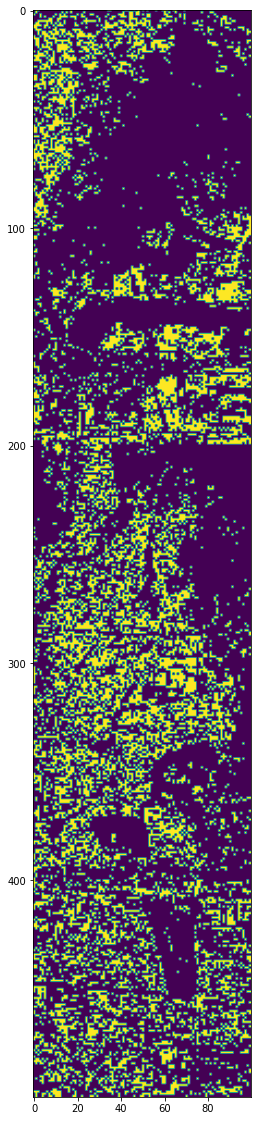

In [69]:
plt.figure(figsize=(20, 20))
plt.imshow(new_image[:500])

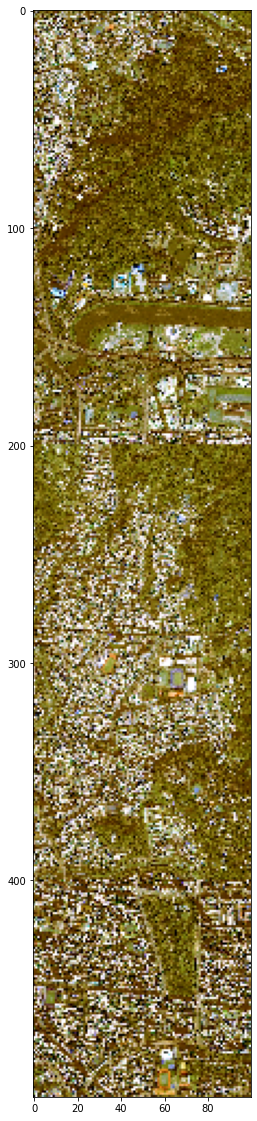

In [64]:
plt.figure(figsize=(20, 20))
plt.imshow(X.reshape((img.shape[0], img.shape[1], img.shape[2]))[:500])

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
mask_tmp = mask[200:300, :]
df_tmp = pd.DataFrame(mask_tmp.reshape((100*100)))
df_tmp['row'] = df_tmp.index // mask_tmp.shape[0]
df_tmp['col'] = df_tmp.index % mask_tmp.shape[1]
image_tmp = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=[0]).values

In [159]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(df_tmp[['row', 'col']], df_tmp[0])
df_tmptmp = df_tmp.copy()
df_tmptmp['pred'] = knn.predict(df_tmptmp[['row', 'col']])

In [160]:
image_tmp = pd.pivot_table(df_tmp, index=['row'], columns=['col'], values=[0]).values

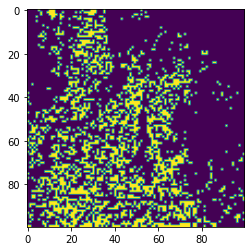

In [161]:
plt.imshow(image_tmp)

In [162]:
image_tmp = pd.pivot_table(df_tmptmp, index=['row'], columns=['col'], values=['pred']).values

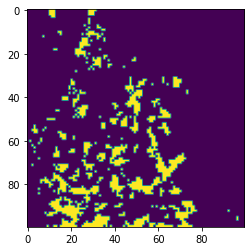

In [163]:
plt.imshow(image_tmp)

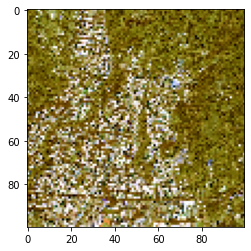

In [164]:
plt.imshow(X.reshape((img.shape[0], img.shape[1], img.shape[2]))[200:300])